# Top most job skills in 2019

Many sites reported about top most job skills in 2019. 

But their perspectives for ranking are different, so consideration range or skill names are different from each other.
For example, simplilearn.com might have ranked skills using the online student's population, while linkedin.com is considered that they used companies' job postings.

In order to get unbiased ranking result, I gathered ranking data from those sites manually, and summarized them into one ranking list.

The raw data from manual scraping contains so many difference skill names for same skills, so I corrected them into similar categories. 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
raw_data = pd.read_csv('skill2019.csv', delimiter='\t')
raw_data

,Ranks,cio.com,LinkedIn 1,LinkedIn 2,Simplilearn,zdnet.com,thebalancecareers.com,roberthalf.com,siliconrepublic.com,fulltimenomad.com,upwork.com
0,1,Business Analysis,Cloud,"AI,ML",AI,CG,Database,Big data,Data Science,Marketing,Cloud
1,2,Cloud,AI,DevOps,ML,ML,Desktop App,Mobile App,Security,"Mobile App,Desktop App",Business Analysis
2,3,Cloud,Analytical Reasoning,Mobile App,Robotic,Network,Web,Security,Mobile App,Marketing,Biology
3,4,Data Science,HR,Data Science,Blockchain,Security,Systems Admin,PM,Web,Design,Design
4,5,Database,Design,Blockchain,Computing,Cloud,Mobile App,Data architect,DevOps,Security,Cloud
5,6,Web,Mobile App,Security,VR/AR,Desktop App,Marketing,Database,Desktop App,Cloud,GA
6,7,Desktop App,Design,NaN,Security,Business Analysis,Security,Security,Cloud,"AI,ML",Web
7,8,Mobile App,Business Manage,NaN,IoT,DevOps,NaN,Desktop App,PM,Data Science,Cloud
8,9,DevOps,Translation,NaN,NaN,Database,NaN,Network,IoT,Web,Customer Service
9,10,Web,Design,NaN,NaN,Customer Service,NaN,Data Science,NaN,Programming,HR


Each ranking list has its own size, so I have to figure out an equation to summarize all ranks. If I sum simply all ranks for each skill, some skills which were not mentioned in sites would have smaller values, ie higher ranks.
As the maximum length of rank list is 24, so I decided unmmentioned skills would have 25 of rank value.
I make a new data frame which contains 'skill' and 'rank' column.

In [27]:
columns = raw_data.columns.tolist()
columns.remove('Ranks')
columns

['cio.com',
 'LinkedIn 1',
 'LinkedIn 2',
 'Simplilearn',
 'zdnet.com',
 'thebalancecareers.com',
 'roberthalf.com',
 'siliconrepublic.com',
 'fulltimenomad.com',
 'upwork.com']

In [28]:
skill_dic = {}

for col in columns:
    for rank, cell in enumerate(raw_data[col].tolist()):

        if type(cell) is float:  # for nan value
            break
        
        # in some rank list, two skills have the same rank
        skill_list = cell.split(',')
        
        for skill in skill_list:
            if skill in skill_dic:
                skill_dic[skill] += (25-idx)
            else:
                skill_dic[skill] = (25-idx)


skill_dic

{'AI': 10,
 'Analytical Reasoning': 2,
 'Big data': 2,
 'Biology': 2,
 'Blockchain': 4,
 'Business Analysis': 10,
 'Business Manage': 4,
 'CG': 4,
 'Cloud': 20,
 'Computing': 4,
 'Customer Service': 8,
 'Data Science': 12,
 'Data architect ': 2,
 'Database': 8,
 'Design': 16,
 'Desktop App': 12,
 'DevOps': 8,
 'Education': 4,
 'GA': 2,
 'Game': 2,
 'HR': 4,
 'IoT': 6,
 'ML': 10,
 'Marketing': 10,
 'Mobile App': 14,
 'Network': 6,
 'PM': 4,
 'Programming': 2,
 'Robotic': 2,
 'Security': 18,
 'Systems Admin': 6,
 'Testing': 4,
 'Translation': 2,
 'VR/AR': 6,
 'Web': 18,
 'Writing': 4}

In [39]:
from collections import OrderedDict
sorted_d = OrderedDict(sorted(skill_dic.items(), key=lambda x: -x[1]))  # mimnus value for descending sort
sorted_d

OrderedDict([('Cloud', 20),
             ('Web', 18),
             ('Security', 18),
             ('Design', 16),
             ('Mobile App', 14),
             ('Data Science', 12),
             ('Desktop App', 12),
             ('Business Analysis', 10),
             ('AI', 10),
             ('Marketing', 10),
             ('ML', 10),
             ('Database', 8),
             ('DevOps', 8),
             ('Customer Service', 8),
             ('IoT', 6),
             ('Network', 6),
             ('Systems Admin', 6),
             ('VR/AR', 6),
             ('HR', 4),
             ('Business Manage', 4),
             ('Computing', 4),
             ('Writing', 4),
             ('Testing', 4),
             ('CG', 4),
             ('Blockchain', 4),
             ('PM', 4),
             ('Education', 4),
             ('Analytical Reasoning', 2),
             ('Translation', 2),
             ('Game', 2),
             ('Robotic', 2),
             ('Big data', 2),
             ('Data architect

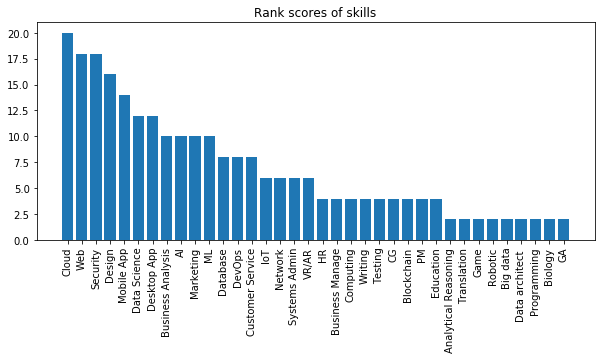

In [42]:
plt.figure(figsize=(10, 4))
plt.bar(sorted_d.keys(), sorted_d.values())
plt.xticks(rotation=90)
plt.title('Rank scores of skills')
plt.show()

I have got the result, but there are some points to be processed more. Skills have complex relations, for example, data science includes big data, AI, ML(Machine Learning), and GA(Genetic Algorithm which can be considered as a part of Machine Learning). And CG(Computer Graphics) is the base skill for VR/AR and ML(especially for deep learning). And for another example, the relationship between security skill, network skill and system administration skill is something ambiguous.
So, I think it is reasonable to merge some base skills into bigger skills. The merged list is following:
- ML, Big data, Data architect, GA -> Data Science
- AI -> Data Science, Robotic
- CG -> Robotic, Data Science, VR/AR
- Programming -> Web, Desktop App, Mobile App, Database, IoT, Computing, Robotics, BlockChain, Game

And the security, system admin and network skills are merged into one skill "System & Security Management".

In [47]:
new_dic = {
    'Cloud': sorted_d['Cloud'],
    'Web Application': sorted_d['Web'] + sorted_d['Programming'],
    'System & Security Management': sorted_d['Security'] + sorted_d['Network'] + sorted_d['Systems Admin'],
    'Design': sorted_d['Design'],
    'Desktop Application': sorted_d['Desktop App'] + sorted_d['Programming'],
    'Mobile Application': sorted_d['Mobile App'] + sorted_d['Programming'],
    'Data Science': sorted_d['Data Science'] + sorted_d['AI'] + sorted_d['ML'] + sorted_d['Data architect '] + sorted_d['GA'] + sorted_d['CG'],
    'Business Analysis': sorted_d['Business Analysis'],
    'Marketing': sorted_d['Marketing'],
    'Database': sorted_d['Database'] + sorted_d['Programming'],
    'DevOps': sorted_d['DevOps'],
    'Customer Service': sorted_d['Customer Service'],
    'IoT': sorted_d['IoT'] + sorted_d['Programming'],
    'VR/AR': sorted_d['VR/AR'] + sorted_d['CG'],
    'HR': sorted_d['HR'],
    'Business Manage': sorted_d['Business Manage'],
    'Computing': sorted_d['Computing'],
    'Writing': sorted_d['Writing'],
    'Translation': sorted_d['Translation'],
    'Blockchain': sorted_d['Blockchain'] + sorted_d['Programming'],
    'Education': sorted_d['Education'],
    'Robotics': sorted_d['Robotic'] + sorted_d['AI'] + sorted_d['CG'],
    'Game': sorted_d['Game'] + sorted_d['Programming'],
    'Project Management': sorted_d['PM'],
    'Human Resource': sorted_d['HR']
}
new_dic

{'Blockchain': 6,
 'Business Analysis': 10,
 'Business Manage': 4,
 'Cloud': 20,
 'Computing': 4,
 'Customer Service': 8,
 'Data Science': 40,
 'Database': 10,
 'Design': 16,
 'Desktop Application': 14,
 'DevOps': 8,
 'Education': 4,
 'Game': 4,
 'HR': 4,
 'Human Resource': 4,
 'IoT': 8,
 'Marketing': 10,
 'Mobile Application': 16,
 'Project Management': 4,
 'Robotics': 16,
 'System & Security Management': 30,
 'Translation': 2,
 'VR/AR': 10,
 'Web Application': 20,
 'Writing': 4}

In [48]:
my_skill_ranks = OrderedDict(sorted(new_dic.items(), key=lambda x: -x[1]))  # mimnus value for descending sort
my_skill_ranks

OrderedDict([('Data Science', 40),
             ('System & Security Management', 30),
             ('Cloud', 20),
             ('Web Application', 20),
             ('Design', 16),
             ('Mobile Application', 16),
             ('Robotics', 16),
             ('Desktop Application', 14),
             ('Business Analysis', 10),
             ('Marketing', 10),
             ('Database', 10),
             ('VR/AR', 10),
             ('DevOps', 8),
             ('Customer Service', 8),
             ('IoT', 8),
             ('Blockchain', 6),
             ('HR', 4),
             ('Business Manage', 4),
             ('Computing', 4),
             ('Writing', 4),
             ('Education', 4),
             ('Game', 4),
             ('Project Management', 4),
             ('Human Resource', 4),
             ('Translation', 2)])

In [52]:
for rank, skill in enumerate(my_skill_ranks.keys()):
    print(str(rank+1) + ". " + skill)

1. Data Science
2. System & Security Management
3. Cloud
4. Web Application
5. Design
6. Mobile Application
7. Robotics
8. Desktop Application
9. Business Analysis
10. Marketing
11. Database
12. VR/AR
13. DevOps
14. Customer Service
15. IoT
16. Blockchain
17. HR
18. Business Manage
19. Computing
20. Writing
21. Education
22. Game
23. Project Management
24. Human Resource
25. Translation


# Conclusion

I summarized the top most skills in 2019 from some sited which reported rank lists. The ranks of the sites are from various perspectives and have difference range or names of skills. The skills I have gathered have so complex inter-relationships such as implication and overlapping.
I have tried to make an unbiased result, but I am not sure it is.

** My Top 25 Skills in 2019 **
1. Data Science
2. System & Security Management
3. Cloud
4. Web Application
5. Design
6. Mobile Application
7. Robotics
8. Desktop Application
9. Business Analysis
10. Marketing
11. Database
12. VR/AR
13. DevOps
14. Customer Service
15. IoT
16. Blockchain
17. HR
18. Business Manage
19. Computing
20. Writing
21. Education
22. Game
23. Project Management
24. Human Resource
25. Translation

